# Density-Based Clustering Examples

Density-based techniques identify clusters based on local neighborhoods and reachability.

## Setup

We import NumPy and Clustor, configure NumPy printing for readability, and create a small dataset with two obvious clusters.

In [1]:
import sys
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

root = Path.cwd()
if not (root / "python").exists():
    for parent in root.parents:
        if (parent / "python").exists():
            root = parent
            break

sys.path.insert(0, str(root / "python"))

import clustor  # noqa: E402

np.set_printoptions(precision=6, suppress=True)

X = np.array(
    [
        [0.0, 0.0],
        [0.0, 1.0],
        [1.0, 0.0],
        [10.0, 10.0],
        [10.0, 11.0],
        [11.0, 10.0],
    ],
    dtype=np.float64,
)

X

array([[ 0.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [10., 10.],
       [10., 11.],
       [11., 10.]])

## DBSCAN

DBSCAN discovers dense regions and returns noise labels when points are isolated.

In [2]:
db = clustor.DBSCAN(eps=1.6, min_samples=2)
db_out = db.fit(X)
db_out["labels"]

array([0, 0, 0, 1, 1, 1])

In [3]:
db_out["core_sample_indices"]

array([0, 1, 2, 3, 4, 5])

## OPTICS

OPTICS provides an ordering and reachability profile for extracting clusters.

In [4]:
opt = clustor.OPTICS(min_samples=2, max_eps=2.0)
opt_out = opt.fit(X)
opt_out["ordering"]

array([0, 2, 1, 3, 5, 4])

In [5]:
opt_out["reachability"]

array([inf,  1.,  1., inf,  1.,  1.])

In [6]:
opt_out["core_distances"]

array([1., 1., 1., 1., 1., 1.])

In [7]:
opt_out["predecessor"]

array([-1,  0,  0, -1,  3,  3])

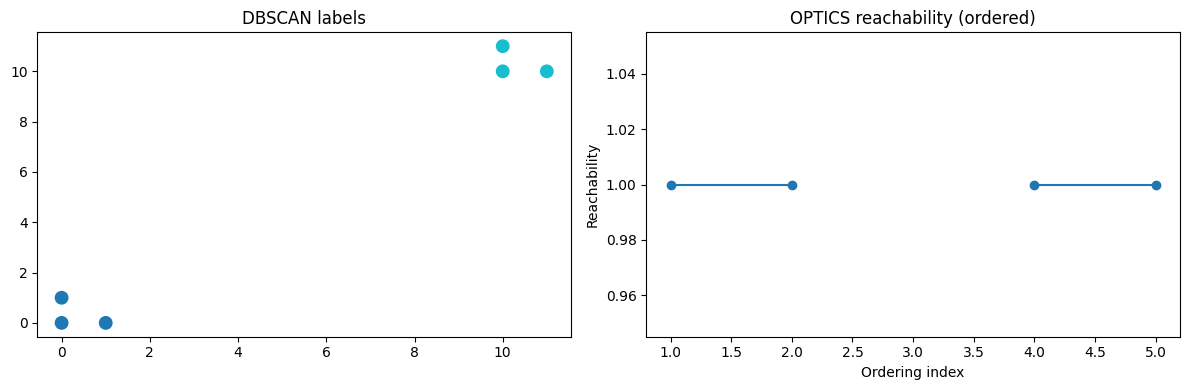

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].scatter(X[:, 0], X[:, 1], c=db_out["labels"], cmap="tab10", s=80)
axes[0].set_title("DBSCAN labels")
ordering = opt_out["ordering"]
reachability = opt_out["reachability"][ordering]
axes[1].plot(reachability, marker="o")
axes[1].set_title("OPTICS reachability (ordered)")
axes[1].set_xlabel("Ordering index")
axes[1].set_ylabel("Reachability")
plt.tight_layout()